In [1]:
import numpy as np
import importlib
%matplotlib inline
import matplotlib.pyplot as plt


# Regresión y clasificación
\begin{align}
Inteligencia Artificial\\
18\ de\ abril\ de\ 2018
\end{align}

Utilizando cuadernos de Python, realizar los ejercicios siguientes:
## 1. REGRESIÓN
### 1. Dados los datos siguientes, elegir las características necesarias para ajustar una curva de regresión:
\begin{align}
   \begin{bmatrix}
   X & Y\\
   0.1 & -0.01\\
   1.05 & 0.978\\
   2.01 & 1.4\\
   3.003 & 1.74\\
   4.11 & 2.1\\
   4.99 & 2.3\\
   5.9 & 2.5
   \end{bmatrix}
\end{align}

### a) Graficar los datos. 

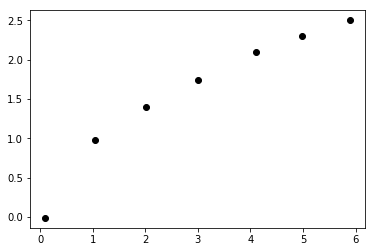

In [3]:
x = np.array([[0.1], [1.05], [2.01], [3.003], [4.11], [4.99], [5.89]])
y = np.array([[-0.01], [0.978], [1.4], [1.74], [2.1], [2.3], [2.5]])
for i in range(0, len(x)):
    plt.plot(x[i], y[i], 'ko')

### ¿Que tipo de curva y' = θf(x) tiene un comportamiento semejante a la grafica obtenida? (e.g. exponencial, coseno, logaritmo, etc.)
La función raíz cuadrada

### b) Generar nuevas características $x' = f(x)$ usando la $f(x)$ identificada anteriormente. Calcular los valores correspondientes para las nuevas $x'$.

In [4]:
# vector x con sus valores afectados por la función raíz cuadrada
xp = np.sqrt(x)
print(xp)

[[0.31622777]
 [1.02469508]
 [1.41774469]
 [1.73291662]
 [2.02731349]
 [2.23383079]
 [2.42693222]]


### c) Graficar los datos $(x', y)$ con las características $x'$ elegidas.

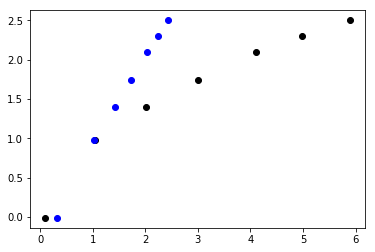

In [5]:
for i in range(0, len(x)):
    plt.plot(x[i], y[i], 'ko')
for i in range(0, len(x)):
    plt.plot(xp[i], y[i], 'bo')

### d) Ajustar el plano/recta en el espacio transformado $y$ vs $x'$ utilizando la ecuacion normal $θ = (X^T X)^{−1} X^T Y $

In [6]:
xpt = np.transpose(xp)

xtx = np.dot(xpt, xp)

xtxInv = np.linalg.inv(xtx)

xty = np.dot(xpt, y)

theta = np.dot(xtxInv, xty)
print("El valor de theta queda: ")
print(theta)

El valor de theta queda: 
[[1.01458926]]


### e) Calcular la expresion correspondiente en el espacio original (sustituir las $x'$ por la funcion que representan $f(x)$).

In [7]:
yp = xp*theta
print(y)
print(yp)

[[-0.01 ]
 [ 0.978]
 [ 1.4  ]
 [ 1.74 ]
 [ 2.1  ]
 [ 2.3  ]
 [ 2.5  ]]
[[0.3208413 ]
 [1.03964462]
 [1.43842854]
 [1.75819859]
 [2.0568905 ]
 [2.26642074]
 [2.46233937]]


### f) Graficar la funcion ajustada en el espacio original $y$ vs $x$.
Se grafica la original en negro y la otra en azúl.

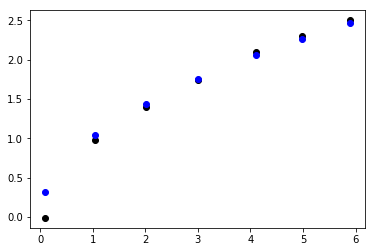

In [9]:
for i in range(0, len(x)):
    plt.plot(x[i], y[i], 'ko')
for i in range(0, len(x)):
    plt.plot(x[i], yp[i], 'bo')

## 2. CLASIFICACION
### 2. Entrene un clasificador utilizando descenso por el gradiente para detectar la frontera entre los datos siguientes.



\begin{align}
   \begin{bmatrix}
   X & Y &  clasificación\\
   -0.6861007046 & -2.7317977268 & FALSO\\  
    0.1845728382 &  0.451296404  & VERDADERO\\ 
   -2.3158346172 & -0.6509207096 & FALSO\\  
   -1.0254515503 & -0.0809364635 & VERDADERO\\ 
    0.4311453719 &  0.8026880194 & VERDADERO\\  
   -3.7719061095 &  0.814367149  & FALSO\\ 
    0.8427785188 & -1.0716033783 & VERDADERO\\ 
    2.2864584569 & -2.9176860601 & FALSO\\ 
   -0.2791914176 & -0.8346607406 & VERDADERO\\ 
   -0.9005654622 & -2.2787579969 & FALSO\\ 
    0.1421184987 & -1.213108765  & VERDADERO\\ 
    3.1509795878 & -3.7415509261 & FALSO\\ 
    0.6174679771 & -0.5790232979 & VERDADERO\\
    2.0068530366 & -1.4894149248 & FALSO\\
    3.5943855252 & -0.8032932784 & FALSO\\
   \end{bmatrix}
\end{align}


### a) Graficar los datos.
Graficamos en circulos verdes los valores verdaderos y en '+' rojos para los falsos

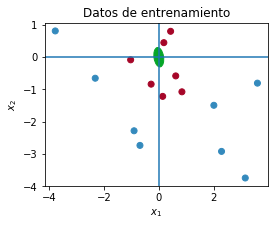

In [33]:
from IPython.core.pylabtools import figsize
figsize(4, 3)
colores = ["#348ABD", "#A60628","#06A628"]
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Ellipse
import numpy.random as rnd

XOrig = np.array([[-0.6861007046, -2.7317977268],
                  [0.1845728382, 0.451296404],
                  [-2.3158346172, -0.6509207096],
                  [-1.0254515503, -0.0809364635],
                  [0.4311453719, 0.8026880194],
                  [-3.7719061095, 0.814367149],
                  [0.8427785188, -1.0716033783],
                  [2.2864584569, -2.9176860601],
                  [-0.2791914176, -0.8346607406],
                  [-0.9005654622, -2.2787579969],
                  [0.1421184987, -1.213108765],
                  [3.1509795878, -3.7415509261],
                  [0.6174679771, -0.5790232979],
                  [2.0068530366, -1.4894149248],
                  [3.5943855252, -0.8032932784]])
Y = np.array([[0],[1],[0],[1],[1],[0],[1],[0],[1],[0],[1],[0],[1],[0],[0]])
        
def grafica_datos(X, Y, XVars=(0,1)):
    """
    Grafica en el plano X_{XVars[0]}, X_{Vars[1]} usando colores para indicar Y.
    """
    fig = plt.gcf()
    c = np.vectorize(lambda b: colores[b])(Y.ravel())
    
    plt.title("Datos de entrenamiento")
    plt.xlabel("$x_" + str(XVars[0] + 1) + "$")
    plt.ylabel("$x_" + str(XVars[1] + 1) + "$")
    plt.axhline(y = 0)
    plt.axvline(x = 0)
    plt.scatter(X[:,XVars[0]], X[:,XVars[1]], color=c)
    
    e = Ellipse(xy=(0,0), width=rnd.rand(), height=rnd.rand(), angle=rnd.rand()*360, color=colores[2])
    fig.gca().add_artist(e)
grafica_datos(XOrig, Y)

### b) Listar características derivadas correspondientes a todos términos de un polinomio de segundo grado y calcular sus valores.

Tomamos los siguientes que son los términos de un polinomio de segundo grado
\begin{align}
    x_1' &= x_1   &   x_2' &= x_2   &   x_3' &= x_1 x_2   &   x_4' &= x_1^2   &   x_5' &= x_2^2
\end{align}

de forma que la hipótesis se ve como:

\begin{align}
    z(x_0,...,x_n) &= \theta_0 x_0 + \theta_1 x_1' + ... + \theta_{n} x_n' \\
    h_\Theta(x_0,...,x_n) &= sigmoide(z)
\end{align}

en forma vectorizada:
\begin{align}
 z(\Theta) &= \Theta^T X \\
 h_\Theta(X) &= sigmoide(z)
\end{align}

In [34]:
# Código para agregar las nuevas características a la matriz X
XCross = np.prod(XOrig, axis=1, keepdims=True)   # x_1 x_2
XSquare = XOrig ** 2                             # x_i^2

# Juntamos las x originales, el producto de ellas y sus cuadrados
X = np.hstack((XOrig, XCross, XSquare))

# Agrega los unos correspondientes a x_0 = 1
X = np.hstack((np.ones((len(X), 1)), X))
print(X)

[[ 1.00000000e+00 -6.86100705e-01 -2.73179773e+00  1.87428835e+00
   4.70734177e-01  7.46271882e+00]
 [ 1.00000000e+00  1.84572838e-01  4.51296404e-01  8.32970582e-02
   3.40671326e-02  2.03668444e-01]
 [ 1.00000000e+00 -2.31583462e+00 -6.50920710e-01  1.50742471e+00
   5.36308997e+00  4.23697770e-01]
 [ 1.00000000e+00 -1.02545155e+00 -8.09364635e-02  8.29964220e-02
   1.05155088e+00  6.55071112e-03]
 [ 1.00000000e+00  4.31145372e-01  8.02688019e-01  3.46075225e-01
   1.85886332e-01  6.44308056e-01]
 [ 1.00000000e+00 -3.77190611e+00  8.14367149e-01 -3.07171642e+00
   1.42272757e+01  6.63193853e-01]
 [ 1.00000000e+00  8.42778519e-01 -1.07160338e+00 -9.03124308e-01
   7.10275632e-01  1.14833380e+00]
 [ 1.00000000e+00  2.28645846e+00 -2.91768606e+00 -6.67116797e+00
   5.22789228e+00  8.51289195e+00]
 [ 1.00000000e+00 -2.79191418e-01 -8.34660741e-01  2.33030115e-01
   7.79478477e-02  6.96658552e-01]
 [ 1.00000000e+00 -9.00565462e-01 -2.27875800e+00  2.05217075e+00
   8.11018152e-01  5.1927

### c) Ajustar el plano en el espacio transformado. Observe que no se pide graficarlo pues este espacio tiene demasiadas dimensiones.

Para ajustar utilizamos descenso por el gradiente, con la función de error:
\begin{align}
  J(\theta) &= -\frac{1}{m} \sum_{i=1}^m \left[ y \log(h_{\theta}(x)) + (1-y) \log(1 - h_{\theta}(x))\right] \\
  h_{\Theta}(X) &= \frac{1}{1 + e^{- \Theta^T X}}
\end{align}

cuya derivada es:
\begin{align}
    \frac{\partial J}{\partial \theta_i} &= \frac{1}{m} \sum_{i=1}^m  \left[ h_{\Theta}(X) - y \right] x_i
\end{align}

Inicializamos theta...

In [35]:
def sigmoide(M):
    """ Evalúa la función sigmoide componente a componente
    y devuelve una matriz con los resultados.
    """
    return 1 / (1 + np.exp(-M))

# Propuesta inicial para los parámetros del plano.
# A propósito queremos que no comience con los datos correctos.
# Se elige una propuesta al azar.
Theta = np.random.random((len(X[0]), 1)) * 4
print(Theta)

[[1.49434979]
 [0.42785935]
 [1.75400755]
 [1.98991699]
 [0.2515133 ]
 [1.94201538]]


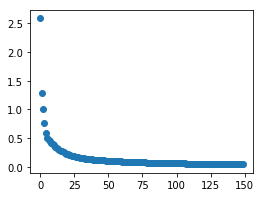

In [36]:
def descenso(iteraciones):
    """
    Realiza descenso por el gradiente sobre los datos en X, con respuestas esperadas Y.
    """
    figsize(4, 3)
    global Theta
    num_iter = iteraciones
    errores = np.zeros(num_iter)
    m = len(X)
    for i in range(0, num_iter):
        #print("X", X)
        #print("Theta", Theta)
        #print(np.dot(X, Theta))
        H = sigmoide(np.dot(X, Theta))
        errores[i] = - (np.sum(Y * np.log(H) + (1 - Y) * np.log(1 - H))) / m
        #print("H", H)
        #print("Y", Y)
        #print("H - Y", H - Y)
        grad = np.dot(X.T, H - Y) / 6
        #print(grad)
        Theta = Theta - 0.15 * grad
    plt.scatter(np.arange(num_iter), errores)
descenso(150)

### d) Calcular la expresion correspondiente en el espacio original.
### e) Graficar la curva ajustada en el espacio original.

Parámetros iniciales. Theta =  [ 4.37652132  1.03583109  1.13413896  0.40584846 -1.16156365 -0.71118007]


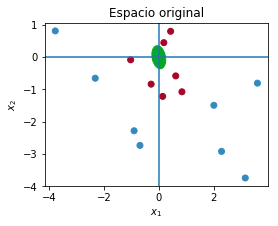

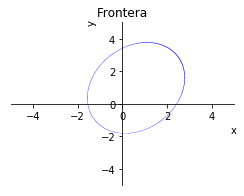

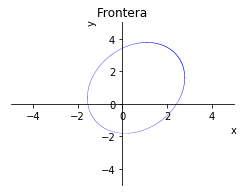

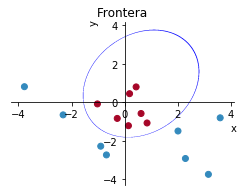

In [38]:
from sympy import var
from sympy.plotting import plot_implicit
from IPython import display


def plot_transformed(X, Y, Theta):
    Theta = Theta.ravel()
    print("Parámetros iniciales. Theta = ", Theta)
    var('x y')
    p = plot_implicit(Theta[0] + Theta[1] * x + Theta[2] * y + Theta[3] *x*y + Theta[4] * x**2 + Theta[5] * y**2, x, y,
                      title = "Frontera", show=True)
    p.show()
    backend = p._backend
    axes = backend.fig.get_axes()[0]
    c = np.vectorize(lambda b: colores[b])(Y.ravel())
    axes.scatter(X[:,0], X[:,1], color=c)
    return backend.fig

grafica_datos(XOrig, Y)
t =plt.title("Espacio original")
plot_transformed(XOrig, Y, Theta)